In [5]:
import tensorflow as tf 
import pandas as pd
from keras.utils import to_categorical
import random 
import numpy as py 
import os
import matplotlib.pyplot as plt
import scipy
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential 
from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [6]:
MODEL_FILENAME="model_cnnnofold.h5"

In [7]:
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    from sklearn.metrics import plot_confusion_matrix
    plot_confusion_matrix(cm, normalize=False,title='Confusion matrix',cmap=plt.cm.Blues)
    # Classification Report
    from sklearn.metrics import classification_report
    print(classification_report(y_true, y_pred))
    return accuracy, precision, f1Score

In [8]:
#importing dataset
# Define Constants by re-sizing all the images
img_rows, img_cols =  224, 224   #input image dimensions

train_path = 'C:/Users/Hannah/Documents/FYP/testsplit/augmentation/train(aug)'
validation_path = 'C:/Users/Hannah/Documents/FYP/testsplit/augmentation/validation(aug)'
test_path = 'C:/Users/Hannah/Documents/FYP/testsplit/test'

In [9]:
base_model=InceptionV3(input_shape=(img_rows, img_cols,3), weights='imagenet', include_top=False)
    
for layer in base_model.layers:
    layer.trainable = False
        
last_layer=base_model.get_layer('mixed7')
print('last layer output shape:', last_layer.output_shape)
last_output=last_layer.output
    
x =Flatten()(last_output)
x =Dense(1024, activation='relu')(x)
x =Dropout(0.20)(x)
x =BatchNormalization()(x)
x =Dense(64, activation='relu')(x)
x =Dense(10, activation='softmax')(x)
    
model=Model(inputs=base_model.input, outputs=x)
    
optimizer='Adam'
loss='categorical_crossentropy'
    
model.compile(optimizer=optimizer,
                loss=loss,
                metrics=["accuracy"])

model.summary()

last layer output shape: (None, 12, 12, 768)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_________________________________________________

In [7]:
# learning rate
batch_size = 16
epoch=55
train_datagen = ImageDataGenerator(
                      rescale=1./255,
                      zoom_range=0.20,
                      shear_range = 0.2,
                      horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale=1./255)
    
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_path,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical') 

history=model.fit(train_generator,validation_data=validation_generator,
                                epochs=epoch,steps_per_epoch=len(train_generator),
                                validation_steps=len(validation_generator),verbose=1)

Found 29030 images belonging to 10 classes.
Found 8705 images belonging to 10 classes.
Epoch 1/55
1815/1815 [==============================] - 391s 207ms/step - loss: 0.5535 - accuracy: 0.8125 - val_loss: 1.6933 - val_accuracy: 0.7311
Epoch 2/55
1815/1815 [==============================] - 344s 189ms/step - loss: 0.3255 - accuracy: 0.8891 - val_loss: 0.2602 - val_accuracy: 0.9112
Epoch 3/55
1815/1815 [==============================] - 338s 186ms/step - loss: 0.2736 - accuracy: 0.9059 - val_loss: 0.1980 - val_accuracy: 0.9299
Epoch 4/55
1815/1815 [==============================] - 361s 199ms/step - loss: 0.2368 - accuracy: 0.9190 - val_loss: 0.2305 - val_accuracy: 0.9198
Epoch 5/55
1815/1815 [==============================] - 333s 184ms/step - loss: 0.2143 - accuracy: 0.9249 - val_loss: 0.1942 - val_accuracy: 0.9318
Epoch 6/55
1815/1815 [==============================] - 321s 177ms/step - loss: 0.1963 - accuracy: 0.9334 - val_loss: 0.1784 - val_accuracy: 0.9414
Epoch 7/55
1815/1815 [===

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

print("Training Accuracy: %.2f" % acc[-1])
print("Training Loss: %.2f" % loss[-1])
print("Validation Accuracy: %.2f" % val_acc[-1])
print("Validation Loss: %.2f" % val_loss[-1] + '\n\n')

Training Accuracy: 0.98
Training Loss: 0.06
Validation Accuracy: 0.96
Validation Loss: 0.13




In [10]:
y_pred=model.predict(validation_generator,train_generator)
y_pred

array([[1.10364535e-05, 8.56964180e-05, 9.87085402e-01, ...,
        2.78280822e-05, 3.94952693e-08, 1.49899859e-06],
       [1.31868405e-11, 1.14462351e-09, 1.00000000e+00, ...,
        5.50301263e-11, 1.39864926e-14, 4.66930661e-10],
       [1.14534514e-05, 4.95422352e-03, 1.53073330e-07, ...,
        2.47574178e-07, 7.98664868e-09, 5.86879034e-09],
       ...,
       [2.73576347e-06, 3.16298987e-10, 8.19019697e-09, ...,
        5.15826626e-09, 1.23500199e-14, 4.52282526e-12],
       [4.64162432e-12, 6.65841893e-14, 2.91218334e-11, ...,
        1.00000000e+00, 6.55410854e-16, 1.26585144e-14],
       [1.90944394e-09, 6.91579953e-06, 9.99992847e-01, ...,
        1.95103116e-08, 2.11770293e-12, 5.47599119e-11]], dtype=float32)

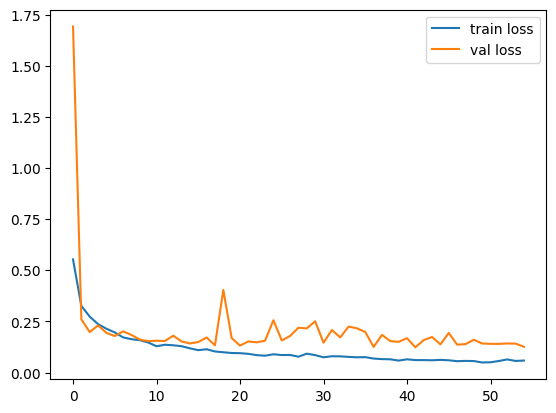

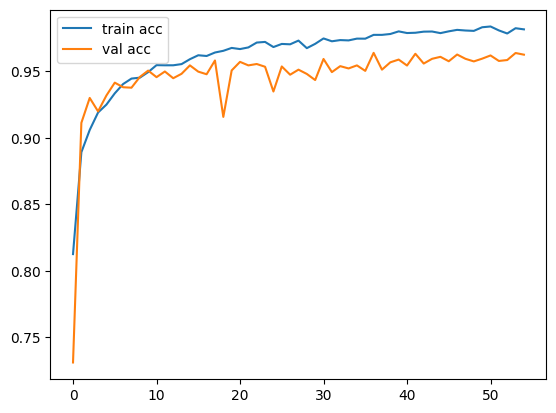

In [11]:
import matplotlib.pyplot as plt
    # Plot the Loss and Accuracy
    # Loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

    # Accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [12]:
print("==============TEST RESULTS============")
test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False) 

predictions = model.predict(test_generator, verbose=1)
yPredictions = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

testAcc,testPrec, testFScore = my_metrics(true_classes, yPredictions)

==============TEST RESULTS============
Found 2902 images belonging to 10 classes.
182/182 [==============================] - 10s 51ms/step
Accuracy  : 0.9431426602343211
Precision : 0.9444998066163737
f1Score : 0.9429517151045643
[[324   0   1   0  11   1   3   0   0   0]
 [  2 121  11   0  18   2   4   0   2   0]
 [  0   5 292   4   1   2   1   0   0   0]
 [  1   2   1 139   4   3   2   0   0   0]
 [  0   3   3   3 268   4   0   0   0   2]
 [  0   0   4   0   0 256   7   0   0   1]
 [  1   2   1   0   5   7 198   0   1   9]
 [  4   0   6   3   2   7   2 829   4   0]
 [  0   0   0   0   1   1   0   0  57   0]
 [  0   0   0   0   0   0   1   0   0 253]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       340
           1       0.91      0.76      0.83       160
           2       0.92      0.96      0.94       305
           3       0.93      0.91      0.92       152
           4       0.86      0.95      0.90       283
           5  

In [13]:
model.save(MODEL_FILENAME)